----- Build dataset -----

In [1]:
from google.colab import files
uploaded = files.upload()

Saving anuka.zip to anuka.zip


In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['anuka.zip']), 'r')
data.extractall()

In [3]:
import os
!mkdir dataset_anuka
os.makedirs("dataset_anuka_vgg16/Tipo A_ Kunzea")
os.makedirs("dataset_anuka_vgg16/Tipo B_ Lepto")
!mkdir dataset_vgg16

In [4]:
dataset_anuka_dir = '/content/dataset_anuka'
dataset_vgg16_dir = '/content/dataset_anuka_vgg16'

In [5]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns

from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 
import pandas as pd 

In [6]:
kunsea_dir = '/content/anuka/Tipo A_ Kunzea/'
lepto_dir = '/content/anuka/Tipo B_ Lepto/'

kunsea_data = os.listdir(kunsea_dir)
print(len(kunsea_data))

lepto_data = os.listdir(lepto_dir)
print(len(lepto_data))

1200
1200


In [7]:
data = []
labels = []
for img in kunsea_data:
    try:
        img_read = plt.imread(kunsea_dir + "/" + img)
        #img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_read)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in lepto_data:
    try:
        img_read = plt.imread(lepto_data + "/" + img)
        #img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_read)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [8]:
image_data = np.array(data)
labels = np.array(labels)

In [9]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [11]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [12]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (960, 100, 100, 1)
SHAPE OF TESTING IMAGE DATA : (240, 100, 100, 1)
SHAPE OF TRAINING LABELS : (960, 2)
SHAPE OF TESTING LABELS : (240, 2)


----- CNN ----- 

In [13]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

CNN v1

In [19]:
def BuildCNN1(height, width, classes, channels):
    modelCNN1 = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    
    modelCNN1.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    modelCNN1.add(MaxPooling2D(2,2))      

    modelCNN1.add(Conv2D(32, (3,3), activation = 'relu'))
    modelCNN1.add(MaxPooling2D(2,2))      

    modelCNN1.add(Conv2D(32, (3,3), activation = 'relu'))
    modelCNN1.add(MaxPooling2D(2,2))

    modelCNN1.add(Flatten())
    
    modelCNN1.add(Dense(512, activation = 'relu'))
    modelCNN1.add(Dense(classes, activation = 'softmax'))
    
    return modelCNN1

CNN v2

In [15]:
def BuildCNN2(height, width, classes, channels):
    modelCNN2 = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1    
    
    modelCNN2.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    modelCNN2.add(MaxPooling2D(2,2)) 
    modelCNN2.add(BatchNormalization(axis = chanDim))
    modelCNN2.add(Dropout(0.2))

    modelCNN2.add(Conv2D(32, (3,3), activation = 'relu'))
    modelCNN2.add(MaxPooling2D(2,2))  
    modelCNN2.add(BatchNormalization(axis = chanDim)) 
    modelCNN2.add(Dropout(0.2))

    modelCNN2.add(Conv2D(32, (3,3), activation = 'relu'))
    modelCNN2.add(MaxPooling2D(2,2)) 
    modelCNN2.add(BatchNormalization(axis = chanDim))
    modelCNN2.add(Dropout(0.2))

    modelCNN2.add(Flatten())
    
    modelCNN2.add(Dense(512, activation = 'relu'))  
    modelCNN2.add(BatchNormalization(axis = chanDim))  
    modelCNN2.add(Dropout(0.5))
    modelCNN2.add(Dense(classes, activation = 'softmax'))
    
    return modelCNN2

In [16]:
#instantiate the model
height = 100
width = 100
classes = 2
channels = 1

In [20]:
modelCNN1 = BuildCNN1(height = height, width = width, classes = classes, channels = channels)
modelCNN1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 32)      

In [21]:
modelCNN2 = BuildCNN2(height = height, width = width, classes = classes, channels = channels)
modelCNN2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 32)      

In [22]:
#compile the model
modelCNN1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
modelCNN2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Train CNN v1

In [23]:
def PlotCNN(history):
  plt.figure(figsize = (18,8))
  plt.plot(range(20), history.history['accuracy'], label = 'Training Accuracy')
  plt.plot(range(20), history.history['loss'], label = 'Training Loss')
  plt.xlabel("Number of Epoch's")
  plt.ylabel('Accuracy/Loss Value')
  plt.title('Training Accuracy and Training Loss')
  plt.legend(loc = "best")

In [24]:
def EvaluateCNN(model):
  #evaluate the model on test data
  predictionsCNN = model.evaluate(x_test, y_test)
  print(f'LOSS : {predictionsCNN[0]}')
  print(f'ACCURACY : {predictionsCNN[1]}')

Epoch 1/20
15/15 [==============================] - 13s 18ms/step - loss: 0.0865 - accuracy: 0.9948
Epoch 2/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
15/15 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
15/15 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
15/15 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
15/15 [==============================] - 0s 17ms/step - loss: 0.

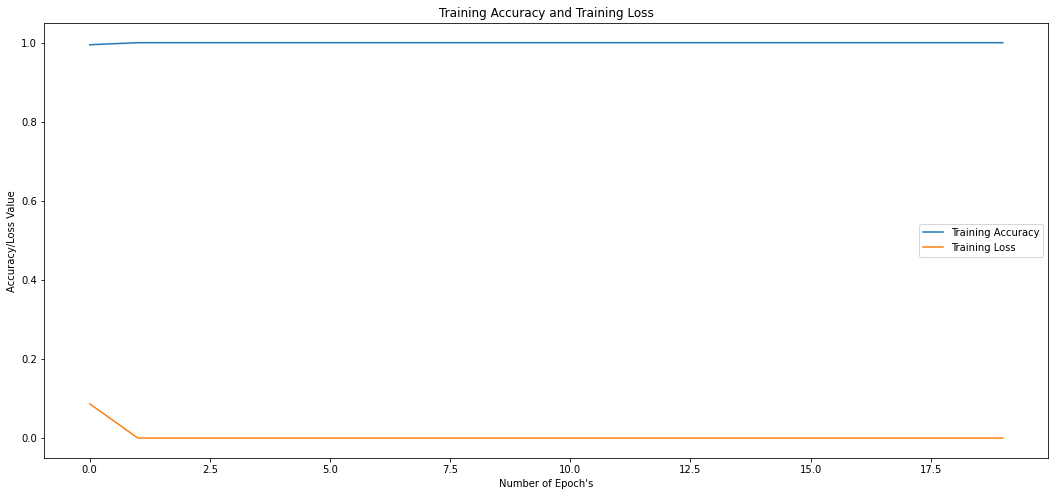

In [25]:
#fit the CNN 1
historyCNN1  = modelCNN1.fit(x_train, y_train, epochs = 20, batch_size = 64)
PlotCNN(historyCNN1)
EvaluateCNN(modelCNN1)

Epoch 1/20
15/15 [==============================] - 2s 23ms/step - loss: 1.0974 - accuracy: 0.5677
Epoch 2/20
15/15 [==============================] - 0s 21ms/step - loss: 0.8186 - accuracy: 0.6354
Epoch 3/20
15/15 [==============================] - 0s 26ms/step - loss: 0.5522 - accuracy: 0.7365
Epoch 4/20
15/15 [==============================] - 1s 33ms/step - loss: 0.3886 - accuracy: 0.8188
Epoch 5/20
15/15 [==============================] - 0s 22ms/step - loss: 0.2748 - accuracy: 0.8938
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.1765 - accuracy: 0.9521
Epoch 7/20
15/15 [==============================] - 0s 27ms/step - loss: 0.1229 - accuracy: 0.9750
Epoch 8/20
15/15 [==============================] - 0s 24ms/step - loss: 0.0954 - accuracy: 0.9823
Epoch 9/20
15/15 [==============================] - 0s 20ms/step - loss: 0.0625 - accuracy: 0.9958
Epoch 10/20
15/15 [==============================] - 0s 20ms/step - loss: 0.0495 - accuracy: 0.9958
Epoch 11/

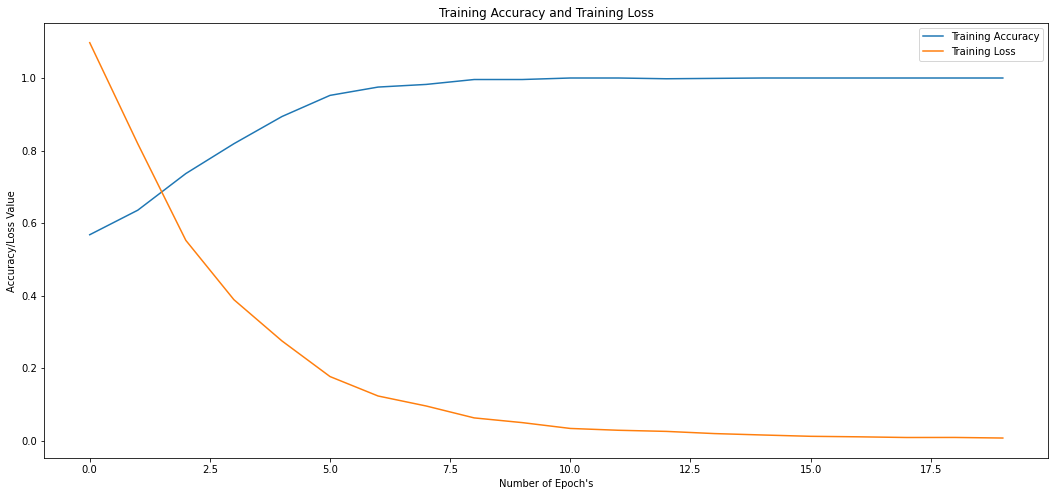

In [26]:
#fit the CNN 2
historyCNN2  = modelCNN2.fit(x_train, y_train, epochs = 20, batch_size = 64)
PlotCNN(historyCNN2)
EvaluateCNN(modelCNN2)



---



------ VGG16 ------



---



In [ ]:
#Resize images to VGG16
vgg16kunsea_dir = '/content/dataset_anuka_vgg16/Tipo A_ Kunzea'
vgg16lepto_dir = '/content/dataset_anuka_vgg16/Tipo B_ Lepto'

myListKunseaImages = os.listdir(kunsea_dir)
myListLeptoImages = os.listdir(lepto_dir)

def resizeAndSave(image_name, file_name, pathToSave):
  img_size=(224,224)  
  img = Image.open(file_name) 
  img = img.resize(img_size, Image.ANTIALIAS)  
  img.save(pathToSave)
  print(pathToSave)

for cl in myListKunseaImages:
  file_name = kunsea_dir + cl 
  pathToSave = os.path.join(vgg16kunsea_dir, cl)  
  resizeAndSave(cl, file_name, pathToSave)

for cl in myListLeptoImages:
  file_name = lepto_dir + cl 
  pathToSave = os.path.join(vgg16lepto_dir, cl)  
  resizeAndSave(cl, file_name, pathToSave)


In [28]:
#Split data
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import splitfolders

splitfolders.ratio('/content/dataset_anuka_vgg16', output='/content/dataset_vgg16',
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 2400 files [00:00, 6449.04 files/s]


In [30]:
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.applications.vgg16 import VGG16
import tensorflow as tf

In [31]:
# define cnn model
def BuildVGG16():
  # load model
  model = VGG16(include_top=False, input_shape=(224, 224, 3))
  # mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
  
  last_layer = model.get_layer('block5_pool')
  last_output = last_layer.output
  x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Dense(2, activation='softmax')(x) #2 clases de salida
  model = tf.keras.Model(model.input, x)  

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [32]:
modelVGG16 = BuildVGG16()
modelVGG16.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [33]:
from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 20

es = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
datagen = ImageDataGenerator(rescale=1./255)
train_it = datagen.flow_from_directory('/content/dataset_vgg16/train', batch_size=64, target_size=(224, 224))
validation_it = datagen.flow_from_directory('/content/dataset_vgg16/val', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/dataset_vgg16/test', batch_size=64, target_size=(224, 224))
# fit model
historyVGG16 = modelVGG16.fit(
      train_it, 
      steps_per_epoch=len(train_it),
      validation_data=validation_it, 
      validation_steps=len(validation_it), 
      epochs=EPOCHS, 
      verbose=1,
      callbacks=[es])

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Epoch 1/20
30/30 [==============================] - 19s 456ms/step - loss: 0.6590 - accuracy: 0.7057 - val_loss: 0.3187 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 10s 327ms/step - loss: 0.3082 - accuracy: 0.8667 - val_loss: 0.2468 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 10s 331ms/step - loss: 0.2530 - accuracy: 0.9026 - val_loss: 0.2219 - val_accuracy: 0.8917
Epoch 4/20
30/30 [==============================] - 10s 334ms/step - loss: 0.2156 - accuracy: 0.9156 - val_loss: 0.2417 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 10s 338ms/step - loss: 0.2063 - accuracy: 0.9250 - val_loss: 0.1925 - val_accuracy: 0.9250
Epoch 6/20
30/30 [==============================] - 10s 340ms/step - loss: 0.1963 - accuracy: 0.9245 - val_loss: 0.1896 - val_accuracy: 0.9042
Epoch 7/20
30/30 [

4/4 [==============================] - 1s 274ms/step - loss: 0.1384 - accuracy: 0.9375
acc > 93.750
loss :  0.13844840228557587


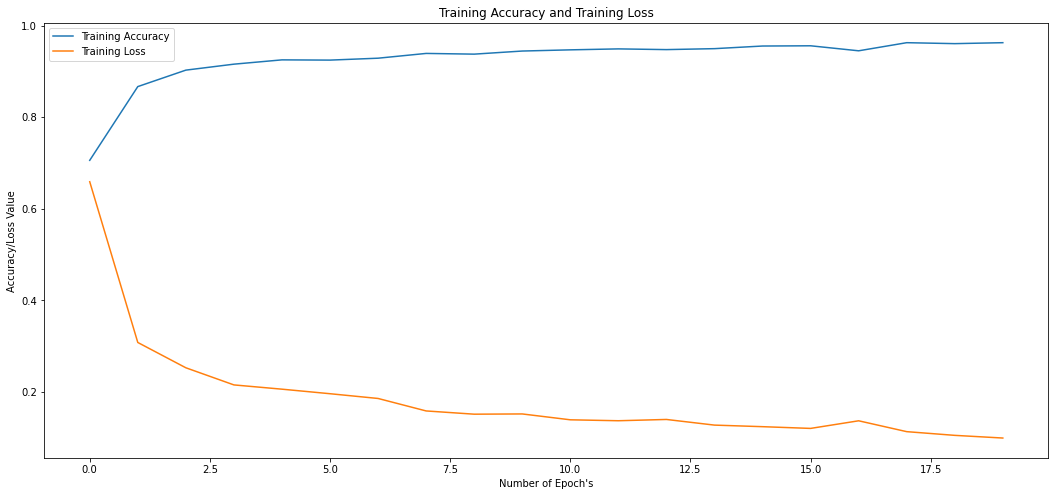

In [34]:
import matplotlib.pyplot as plt

loss, acc = modelVGG16.evaluate(test_it, steps=len(test_it), verbose=1)
print('acc > %.3f' % (acc * 100.0))
print("loss : ", loss)   


plt.figure(figsize = (18,8))
plt.plot(range(20), historyVGG16.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), historyVGG16.history['loss'], label = 'Training Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [41]:
from tqdm import tqdm
VGG16_test_path = '/content/dataset_vgg16/test/'

def load_data(dir_path):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

X_test_VGG16, y_test_VGG16, labels_VGG16 = load_data(VGG16_test_path)
labels

100%|██████████| 2/2 [00:00<00:00, 18.70it/s]

240 images loaded from /content/dataset_vgg16/test/ directory.


array([1, 1, 1, ..., 1, 1, 1])

In [42]:
from matplotlib import pyplot
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    pyplot.figure(figsize = (6,6))
    pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks = np.arange(len(classes))
    pyplot.xticks(tick_marks, classes, rotation=90)
    pyplot.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    pyplot.tight_layout()
    pyplot.ylabel('True label')
    pyplot.xlabel('Predicted label')
    pyplot.show()

In [44]:
#CONFUSION MATRIX VGG16
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

classes = ['Tipo A_ Kunzea', 'Tipo B_ Lepto']

def validateResults(model):   
  predictions = model.predict(X_test_VGG16, batch_size=32)
  y_pred_VGG16 = np.argmax(predictions, axis=1) 
  y_true_VGG16 = np.argmax(y_test, axis=0)  
  print("\n"+ classification_report(y_test_VGG16, y_pred_VGG16, target_names=classes))
  print(confusion_matrix(y_test, y_pred_VGG16))
  confusion_mtx = confusion_matrix(y_test, y_pred_VGG16)  
  cm = plot_confusion_matrix(confusion_mtx, classes = list(labels_VGG16.items()), normalize=False)

validateResults(modelVGG16)


                precision    recall  f1-score   support

Tipo A_ Kunzea       0.70      1.00      0.82       120
 Tipo B_ Lepto       1.00      0.57      0.73       120

      accuracy                           0.79       240
     macro avg       0.85      0.79      0.78       240
  weighted avg       0.85      0.79      0.78       240



ValueError: ignored



---



GRAFICOS COMPARTIDOS



---



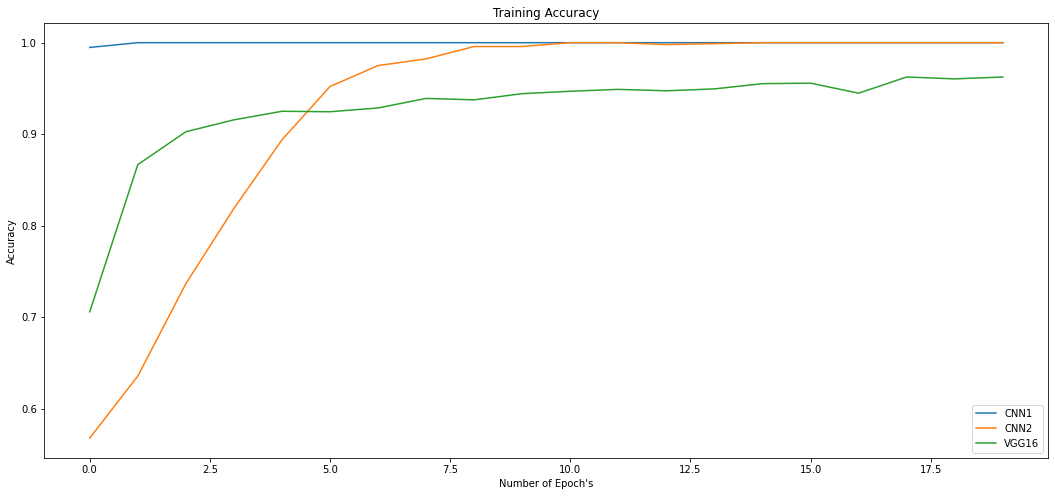

In [40]:
#gráfico compartido accuracy
plt.figure(figsize = (18,8))
plt.plot(range(20), historyCNN1.history['accuracy'], label = 'CNN1')
plt.plot(range(20), historyCNN2.history['accuracy'], label = 'CNN2')
plt.plot(range(20), historyVGG16.history['accuracy'], label = 'VGG16')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend(loc = "best")

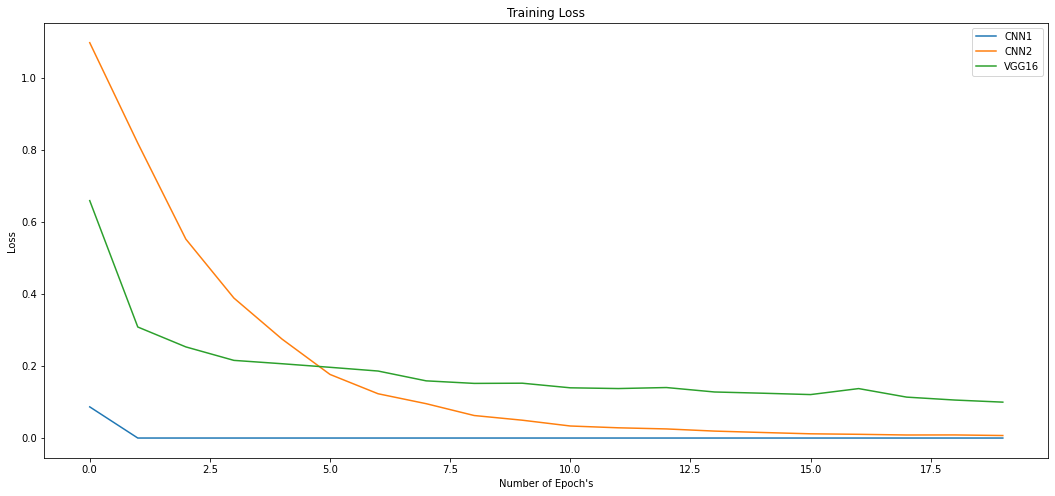

In [39]:
#gráfico compartido loss
plt.figure(figsize = (18,8))
plt.plot(range(20), historyCNN1.history['loss'], label = 'CNN1')
plt.plot(range(20), historyCNN2.history['loss'], label = 'CNN2')
plt.plot(range(20), historyVGG16.history['loss'], label = 'VGG16')

plt.xlabel("Number of Epoch's")
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend(loc = "best")